In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [42]:
data_loaded = pd.read_hdf('summary.h5')
#data_loaded = pd.read_csv('summary.csv')


In [43]:
[col for col in data_loaded.columns if 'only DDF observations' in col and 'Median' in col and 'reducezlim' in col]

['Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:WFD_reducezlim DD:WFD all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer']

In [44]:
name_dict = {'best18k parallax HealpixSlicer': 'parallax best 18k',
            'best18k properMotion HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 5_10 days UserPointsSlicer': '5-10d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO HealpixSlicer': 'fO N vis',
            'Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer': 'SNe, zlim',
            '3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Sum PrestoKNe_score_s UserPointsSlicer': 'KNe Presto S',
            'Total detected XRBPopMetric_early_detect UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7 HealpixSlicer': 'Brown Dwarf Vol',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO bright',
            'CumulativeCompleteness H <= 22.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO faint',
            'CumulativeCompleteness H <= 6.000000 DiscoveryNChances TNO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'TNO',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances Vatira 1 quad in 1 night detection loss MoObjSlicer': 'Vatira'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['5-10d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'Median CoaddM5 g HealpixSlicer': 'g',
 'Median CoaddM5 i HealpixSlicer': 'i',
 'Median CoaddM5 r HealpixSlicer': 'r',
 'Median CoaddM5 u HealpixSlicer': 'u',
 'Median CoaddM5 y HealpixSlicer': 'y',
 'Median CoaddM5 z HealpixSlicer': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN COSMOS',
           'Sum SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ECDFS',
           'Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN EDFS',
           'Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ELAISS1',
           'Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN XMM_LSS',
            
           'Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer': 'zlim COSMOS',
            'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim ECDFS',
            'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim EDFS',
            'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer': 'zlim ELAISS1',
            'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer': 'zlim XMM_LSS',
            
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]
 

In [45]:
data

,parallax best 18k,proper motion best 18k,5-10d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe Presto S,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO,Vatira
baseline_v3.0_10yrs,0.792666,0.185683,0.1618,0.4559,795.0,109475.798536,0.293926,38.643260,423.0,200.0,1950.0,168032.537231,0.9326,0.642155,0.722293,0.0376
proto_baseline_uz_v3.1_10yrs,0.821555,0.192157,0.1541,0.4401,659.0,85305.806994,0.273036,37.057799,345.0,127.0,1629.0,181251.191132,0.9368,0.632599,0.730198,0.0490
proto_baseline_v3.1_10yrs,0.827161,0.192398,0.1566,0.4528,655.0,84925.439596,0.274291,37.126972,343.0,119.0,1753.0,180675.904060,0.9360,0.633156,0.728928,0.0415


In [46]:
mag_data

,g,i,r,u,y,z
baseline_v3.0_10yrs,26.688123,26.264600,26.818287,25.668262,24.756955,25.524781
proto_baseline_uz_v3.1_10yrs,26.648570,26.231257,26.781200,25.666715,24.691187,25.503654
proto_baseline_v3.1_10yrs,26.641104,26.230184,26.764852,25.657576,24.686701,25.517068


In [47]:
ddf_data

,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
baseline_v3.0_10yrs,362.726856,72.383449,74.734786,37.378088,60.363667,0.594675,0.575080,0.526724,0.546128,0.539335
proto_baseline_uz_v3.1_10yrs,364.478689,60.321997,107.574573,10.059690,47.393854,0.594252,0.562732,0.521114,0.553629,0.564971
proto_baseline_v3.1_10yrs,497.289928,263.026587,444.191596,178.259083,172.427358,0.585777,0.584371,0.524819,0.566212,0.568150


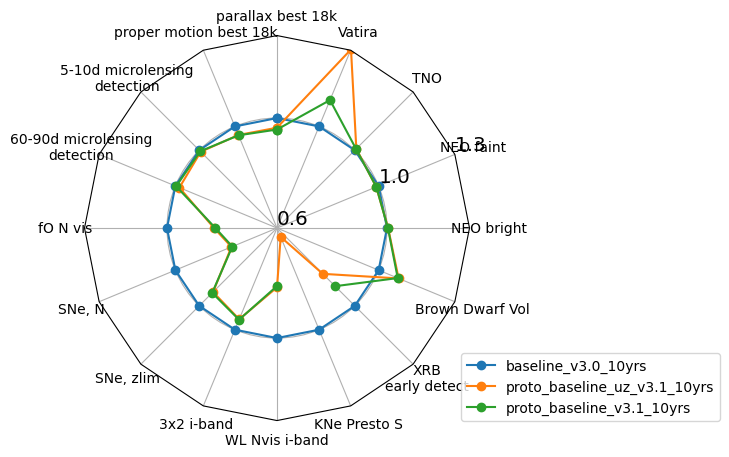

In [49]:
runs = [run for run in data.index ]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='baseline_v3.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.6, 1.0, 1.3], bbox_to_anchor=(1.65, 0))

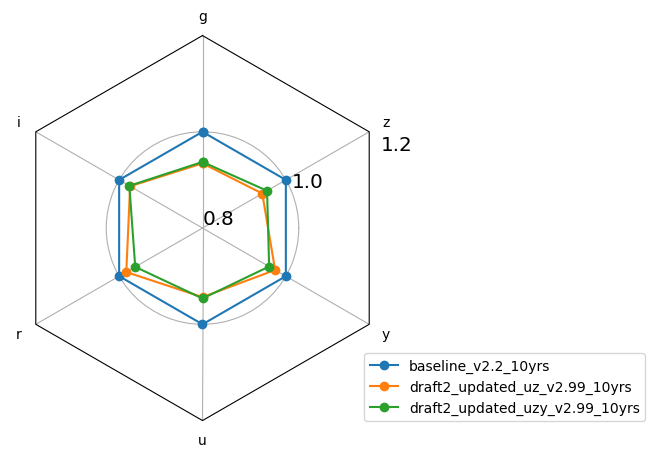

In [10]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='baseline_v2.2_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

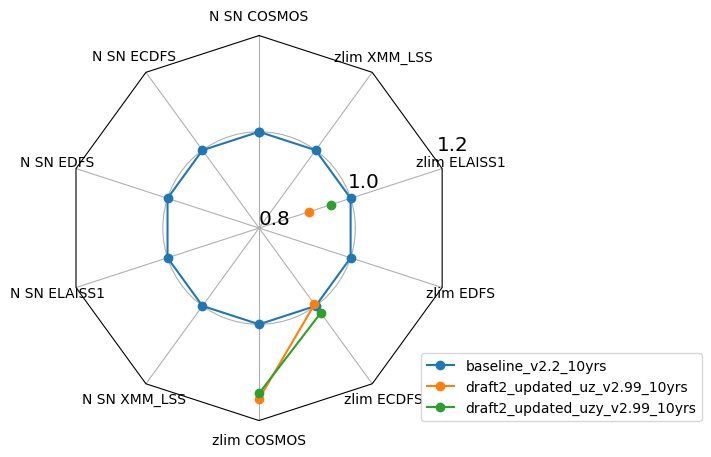

In [11]:
ndata = norm_df(ddf_data, runs, cols=ddf_data.columns.values.tolist(),
                norm_run='baseline_v2.2_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

In [12]:
ddf_data


,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
baseline_v2.2_10yrs,13.647867,6.881372,-1.637500e+30,3.753806,-1.637500e+30,0.514987,0.577431,-1.637500e+30,0.600156,-1.637500e+30
draft2_updated_uz_v2.99_10yrs,362.726856,72.383449,7.473479e+01,37.378088,6.036367e+01,0.594675,0.575080,5.267240e-01,0.546128,5.393345e-01
draft2_updated_uzy_v2.99_10yrs,513.473800,263.138228,4.598576e+02,198.030013,2.021299e+02,0.588849,0.587824,5.187110e-01,0.574497,5.596615e-01


In [13]:
data_loaded['DD:ELAISS1 NVisits all bands Median']

baseline_v2.2_10yrs                9991.0
draft2_updated_uz_v2.99_10yrs     10671.0
draft2_updated_uzy_v2.99_10yrs    11466.0
Name: DD:ELAISS1 NVisits all bands Median, dtype: float64

In [14]:
data_loaded['DD:COSMOS NVisits all bands Median']


baseline_v2.2_10yrs                9853.0
draft2_updated_uz_v2.99_10yrs     18716.5
draft2_updated_uzy_v2.99_10yrs    20739.5
Name: DD:COSMOS NVisits all bands Median, dtype: float64